In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
array = np.array([[1,2,3], [4,5,6], [7,8,9]])
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
df = pd.read_csv('kaupskra.csv', usecols=('faerslunumer', 'postnr', 'sveitarfelag', 'utgdag', 'kaupverd', 'fasteignamat', 'byggar', 'einflm', 'lod_flm', 'tegund', 'fullbuid', 'onothaefur_samningur'))

In [4]:
df.head()


,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,569113,200.0,Kópavogsbær,7/30/2012 0:00,87000,70850,1985,780.4,1105.0,Atvinnuhusnaedi,1,0
1,558760,220.0,Hafnarfjarðarkaupstaður,2/28/2011 0:00,36000,40790,1983,400.0,3000.0,Atvinnuhusnaedi,1,0
2,566833,104.0,Reykjavíkurborg,4/16/2012 0:00,31000,4679,1962,310.2,565.0,Atvinnuhusnaedi,1,1
3,566833,104.0,Reykjavíkurborg,4/16/2012 0:00,31000,5516,1962,310.2,565.0,Atvinnuhusnaedi,1,1
4,628860,104.0,Reykjavíkurborg,2/20/2018 0:00,23500,13200,1962,71.4,565.0,Atvinnuhusnaedi,1,0


In [5]:
df_new = df.drop(df[(df['tegund'] == 'Atvinnuhusnaedi') | (df['onothaefur_samningur'] == 1)].index)
df_new.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
12,685833,105.0,Reykjavíkurborg,3/7/2022 0:00,68250,55700,1992,109.9,5702.0,Fjolbyli,1,0
13,683362,105.0,Reykjavíkurborg,1/14/2022 0:00,122000,86700,1992,212.6,5702.0,Fjolbyli,1,0
14,676099,105.0,Reykjavíkurborg,7/20/2021 0:00,52500,50750,1992,109.9,5702.0,Fjolbyli,1,0
15,660107,105.0,Reykjavíkurborg,8/10/2020 0:00,49900,47750,1992,109.9,5702.0,Fjolbyli,1,0
18,640011,105.0,Reykjavíkurborg,11/9/2018 0:00,48000,43850,1992,109.9,5702.0,Fjolbyli,1,0


In [6]:
df = df_new.copy()
df = df.drop(['fullbuid', 'onothaefur_samningur'], axis=1)
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund
12,685833,105.0,Reykjavíkurborg,3/7/2022 0:00,68250,55700,1992,109.9,5702.0,Fjolbyli
13,683362,105.0,Reykjavíkurborg,1/14/2022 0:00,122000,86700,1992,212.6,5702.0,Fjolbyli
14,676099,105.0,Reykjavíkurborg,7/20/2021 0:00,52500,50750,1992,109.9,5702.0,Fjolbyli
15,660107,105.0,Reykjavíkurborg,8/10/2020 0:00,49900,47750,1992,109.9,5702.0,Fjolbyli
18,640011,105.0,Reykjavíkurborg,11/9/2018 0:00,48000,43850,1992,109.9,5702.0,Fjolbyli


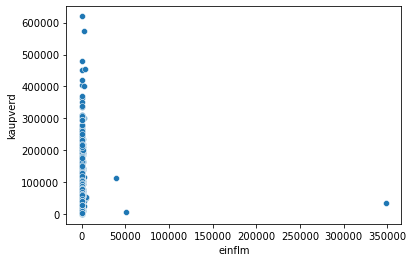

In [7]:
sns.scatterplot(data=df, x='einflm', y='kaupverd')
plt.show()

In [8]:
kalli = df[df['sveitarfelag'] == 'Kópavogsbær']
kalli.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund
85,506283,201.0,Kópavogsbær,6/9/2006 0:00,32500,24310,1997,158.6,5421.0,Fjolbyli
87,675403,201.0,Kópavogsbær,7/2/2021 0:00,49000,42450,1997,91.6,5421.0,Fjolbyli
88,654199,201.0,Kópavogsbær,3/3/2020 0:00,48250,45300,1997,111.1,5421.0,Fjolbyli
89,647882,201.0,Kópavogsbær,8/29/2019 0:00,48000,40950,1997,110.8,5421.0,Fjolbyli
90,641148,201.0,Kópavogsbær,2/6/2019 0:00,49900,40950,1997,110.8,5421.0,Fjolbyli


In [9]:
df[df.einflm == df.einflm.max()]

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund
102133,637892,551.0,Sveitarfélagið Skagafjörður,11/2/2018 0:00,33000,21645,,348615.2,348352.7,Annað


In [10]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\hkristinsson\AppData\Local\Temp\ipykernel_30632\3233543811.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


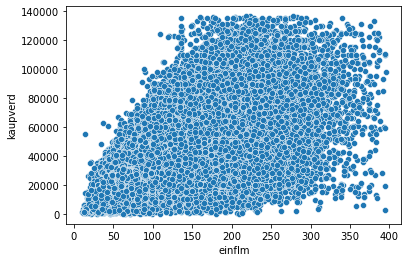

In [11]:
sns.scatterplot(data=df, x='einflm', y='kaupverd')
plt.show()

In [12]:
df['ar'] = df['utgdag'].str[-9:]
df['ar'] = df['ar'].str[:-4]
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,ar
12,685833,105.0,Reykjavíkurborg,3/7/2022 0:00,68250,55700,1992,109.9,5702.0,Fjolbyli,2022
13,683362,105.0,Reykjavíkurborg,1/14/2022 0:00,122000,86700,1992,212.6,5702.0,Fjolbyli,2022
14,676099,105.0,Reykjavíkurborg,7/20/2021 0:00,52500,50750,1992,109.9,5702.0,Fjolbyli,2021
15,660107,105.0,Reykjavíkurborg,8/10/2020 0:00,49900,47750,1992,109.9,5702.0,Fjolbyli,2020
18,640011,105.0,Reykjavíkurborg,11/9/2018 0:00,48000,43850,1992,109.9,5702.0,Fjolbyli,2018


In [13]:
df['utgdag'] = df['utgdag'].str[:-4]
df['utgdag'] = pd.to_datetime(df['utgdag'])
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,ar
12,685833,105.0,Reykjavíkurborg,2022-03-07,68250,55700,1992,109.9,5702.0,Fjolbyli,2022
13,683362,105.0,Reykjavíkurborg,2022-01-14,122000,86700,1992,212.6,5702.0,Fjolbyli,2022
14,676099,105.0,Reykjavíkurborg,2021-07-20,52500,50750,1992,109.9,5702.0,Fjolbyli,2021
15,660107,105.0,Reykjavíkurborg,2020-08-10,49900,47750,1992,109.9,5702.0,Fjolbyli,2020
18,640011,105.0,Reykjavíkurborg,2018-11-09,48000,43850,1992,109.9,5702.0,Fjolbyli,2018


In [14]:
df.sort_values('utgdag', inplace=True)

In [15]:
df['quarter'] = df['utgdag'].dt.to_period('Q')
df['month'] = df['utgdag'].dt.to_period('M')

In [16]:
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,ar,quarter,month
115626,510396,425.0,Ísafjarðarbær,2006-02-11,4000,3808,1924,151.2,293.0,Serbyli,2006,2006Q1,2006-02
32968,507605,740.0,Fjarðabyggð,2006-03-01,14300,1390,2006,145.3,1345.1,Serbyli,2006,2006Q1,2006-03
86686,540134,161.0,Reykjavíkurborg,2006-03-01,11050,17330,1958,224.0,7000.0,Serbyli,2006,2006Q1,2006-03
38968,502951,112.0,Reykjavíkurborg,2006-03-14,24700,19820,1988,112.3,1285.0,Fjolbyli,2006,2006Q1,2006-03
50976,503350,311.0,Borgarbyggð,2006-03-16,15200,4424,2005,58.1,6403.0,Sumarhus,2006,2006Q1,2006-03


<AxesSubplot:xlabel='quarter', ylabel='kaupverd'>

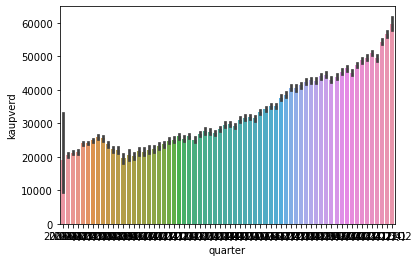

In [17]:
sns.barplot(data=df, x='quarter', y='kaupverd')

In [18]:
df['fmverd'] = df['kaupverd'] / df['einflm']
df['yfirverd'] = (df['kaupverd']-df['fasteignamat'])/df['fasteignamat']
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,ar,quarter,month,fmverd,yfirverd
115626,510396,425.0,Ísafjarðarbær,2006-02-11,4000,3808,1924,151.2,293.0,Serbyli,2006,2006Q1,2006-02,26.455026,0.050420
32968,507605,740.0,Fjarðabyggð,2006-03-01,14300,1390,2006,145.3,1345.1,Serbyli,2006,2006Q1,2006-03,98.417068,9.287770
86686,540134,161.0,Reykjavíkurborg,2006-03-01,11050,17330,1958,224.0,7000.0,Serbyli,2006,2006Q1,2006-03,49.330357,-0.362377
38968,502951,112.0,Reykjavíkurborg,2006-03-14,24700,19820,1988,112.3,1285.0,Fjolbyli,2006,2006Q1,2006-03,219.946572,0.246216
50976,503350,311.0,Borgarbyggð,2006-03-16,15200,4424,2005,58.1,6403.0,Sumarhus,2006,2006Q1,2006-03,261.617900,2.435805


In [19]:
df.dtypes

faerslunumer             int64
postnr                 float64
sveitarfelag            object
utgdag          datetime64[ns]
kaupverd                 int64
fasteignamat             int64
byggar                  object
einflm                 float64
lod_flm                float64
tegund                  object
ar                      object
quarter          period[Q-DEC]
month                period[M]
fmverd                 float64
yfirverd               float64
dtype: object

In [20]:
df = df[df["tegund"].isin(['Serbyli', 'Fjolbyli'])]

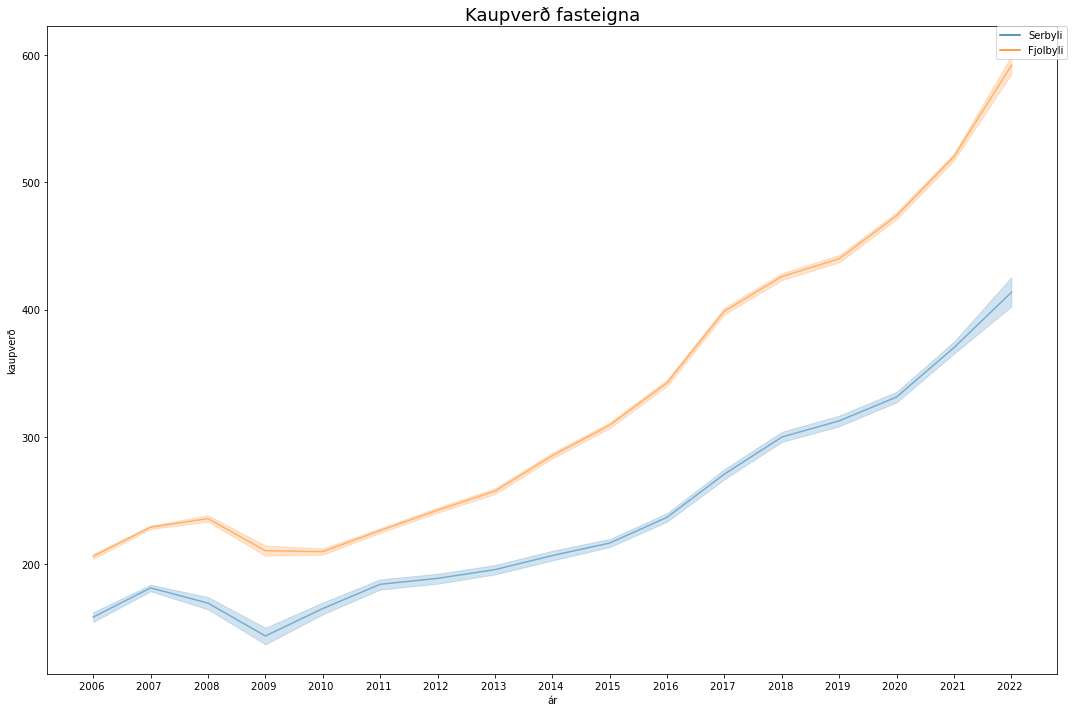

In [21]:
plt.figure(figsize=(16,10))
sns.lineplot(x="ar", 
                y="fmverd",
                alpha=0.5,
                hue="tegund",
                data=df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("ár")
plt.ylabel("kaupverð")
plt.title("Kaupverð fasteigna", fontsize=18)
plt.tight_layout()
plt.show()